In [15]:
#Imports

import numpy as np
import pandas as pd

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline # we need this so plots are displayed in the notebook

In [16]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [17]:
!wget $data --output-document=cardataset.csv

--2022-09-23 01:03:32--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘cardataset.csv’

cardataset.csv      100%[===================>]   1.41M  2.72MB/s    in 0.5s    

2022-09-23 01:03:33 (2.72 MB/s) - ‘cardataset.csv’ saved [1475504/1475504]



In [20]:
df = pd.read_csv('cardataset.csv')

In [21]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 2.2 Data preparation

## Lets make it consistent

some data has spaces, other has uppercase/lowercase etc.

In [26]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [27]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [29]:
# find string columns

df.dtypes # shows what type each column contains

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [30]:
# we want to change objects, objects in csv's are strings

In [32]:
df.dtypes[df.dtypes == 'object'] # 1st column are series second values,
                                # we want the indices

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [35]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [36]:
# lowercase and replace spaces with _
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [37]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [38]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# 2.3 Exploratory Data Analysis

In [40]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [42]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #if not all unique first 5
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

popularity was based on twitter mentions in this case

## Distribution of price

<AxesSubplot:xlabel='msrp', ylabel='Count'>

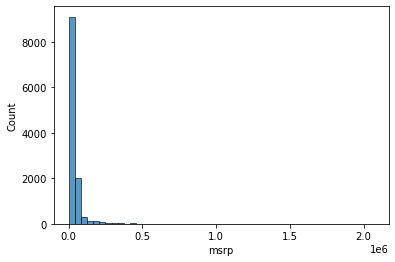

In [51]:
sns.histplot(df.msrp, bins = 50)

Longtail distribution in this case, right side is like a tail not so many
values but there are a few huge values, its common to see this longtail distribution for prices

<AxesSubplot:xlabel='msrp', ylabel='Count'>

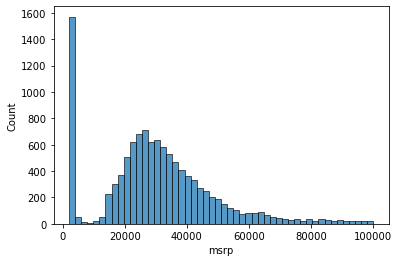

In [53]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

a lot of cars cost 1000, mby the minimum possible price to register

But this longtail will confuse our model so we need to get rid of it,
so we need to somehow get rid of it, logarithm could be an option if we
dont have zeros (if we do we just add +1)

In [54]:
np.log([1, 10, 1000, 100000])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [55]:
np.log([0 + 1 ,1 + 1, 10 +1 , 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [57]:
np.log1p([0, 1, 10, 1000, 100000]) # we can use a built-in function to add 1

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [58]:
price_logs = np.log1p(df.msrp)

In [59]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

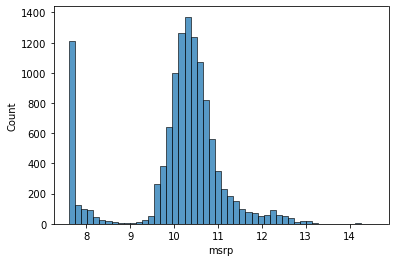

In [60]:
sns.histplot(price_logs, bins = 50)

looks like a normal distribution, if we exclude the weird peak at the 
low values, and if the target variable looks like this then our model 
does quite well, we want generally to get rid of longtail distributions

# Missing Values

for example number of doors

In [62]:
df.isnull().sum() # without sum its not useful, with sum we know per col

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework

Lets draw 60-20-20 split for the data first 

In [63]:
n = len(df)

In [66]:
n_val = int(n * 0.2) # we want integer !!
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [67]:
n, n_val + n_test + n_train

(11914, 11912)

not equal though, due to rounding errors

so instead we need to take out test and val and leave rest for train

In [71]:
n_train = n - n_val - n_test

In [72]:
n

11914

In [69]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [70]:
df.iloc[:10] # from 0 to 9 records

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [75]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [76]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


Its a problem cause its sequential, for eg we see a lot of lincoln in the val
etc, we need to somehow shuffle, shuffling is always good for models

Shuffling here: take data shuffle and split then 

In [89]:
idx = np.arange(n) # generate a vector of indices

In [90]:
np.random.seed(2) # set seed to some number so results are reproducible
np.random.shuffle(idx) # shuffle these indices

In [98]:
idx[:n_train] # how does 1st 60% look like?

array([2735, 6720, 5878, ..., 9334, 5284, 2420])

In [102]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [103]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [104]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [105]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [107]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [108]:
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

Need to apply log transform remember!!

In [110]:
y_train = np.log1p(df_train.msrp.values) # we only need values for training, not the series
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

### We need to delete the price to not accidentally use it as feature, or else our model will look perfect and it would be hard to figure out why, its a good practice to do that now

In [113]:
del df_train['msrp'] 
del df_val['msrp']
del df_test['msrp']

In [116]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [117]:
len(y_train)

7150

# 2.5 Linear Regression

a model for solving regression models, predicting numbers, thats our output!

draw

In [118]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

let's take a few features : horsepower, mpg city, popularity

In [271]:
xi = [453, 11, 86]

In [272]:
w0 = 0 # bias term, what we predict if we dont know anything
w = [1, 1, 1]

In [273]:
def linear_regression(xi):
    
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j]*xi[j]

    return pred

In [274]:
linear_regression(xi)

550

In [275]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [276]:
linear_regression(xi)

12.312

In [277]:
np.expm1(12.312) # we need to revert it with exponent since we applied logarithm to prices
                 # and also subtract 1 (we used log(price+1))

222347.2221101062

# 2.6 Linear Regression Vector Form

In [293]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [294]:
def dot(xi, w):
    
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        
        res = res + xi[j] * w[j]
        
        return res
        

In [295]:
def linear_regression(xi):
    
    return w0 + dot(xi, w)

In [296]:
linear_regression(xi)

11.7

In [297]:
w_new = [w0] + w # new list, prepend with w0

In [298]:
[1] + [1, 2, 3]

[1, 1, 2, 3]

In [299]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [300]:
def linear_regression(xi):
    xi = [1] + xi 
    return dot(xi, w_new)

In [301]:
linear_regression(xi)

7.17

### do it for more records with a matrix

In [302]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0]+ w

In [313]:
x1 = [1, 148, 24, 1385] # This 1 comes from adding w0 to w_new
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [304]:
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [305]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

for each car now we have a prediction

In [306]:
def linear_regression(X):
    return X.dot(w_new)

In [270]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# 2.7 Training a linear regression model 

In [307]:
def train_linear_regression(X, y):
    pass

In [314]:
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

This X is a bit problematic it has more columns than rows, mby the solution the inverse wont
exist at all

So, lets remove  the ones and add some rows

In [355]:
X = [
    [148, 24, 1385], 
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185], 
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185], 
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [317]:
XTX = X.T.dot(X)

In [320]:
XTX_inv = np.linalg.inv(XTX)

In [322]:
XTX.dot(XTX_inv) # to check whether it gives identity matrix, it could be that some are rly 
                # small instead of zeros

array([[ 1.00000000e+00,  8.88178420e-16,  0.00000000e+00],
       [-2.27682456e-18,  1.00000000e+00,  3.46944695e-18],
       [ 1.04083409e-16,  0.00000000e+00,  1.00000000e+00]])

In [323]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [325]:
XTX_inv.dot(X.T).dot(y) 

array([0.26190562, 3.06101252, 0.03696909])

But we forgot the bias term, we trained the model without the bias term, so we get 3 elements
instead of 4 (3 features here + 1 bias term if we add it )

#### So lets add the bias term, the baseline

in other words, how much a car costs if we dont know anything

In [346]:
ones = np.ones(X.shape[0]) # we need as many ones as the rows
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [347]:
np.column_stack([ones, ones]) # takes  vectors and/or matrices and addes them together

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [348]:
np.column_stack([ones, X]) # in this way we can add the ones for the bias term

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [349]:
X = np.column_stack([ones, X]) 
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)

In [350]:
w_full = XTX_inv.dot(X.T).dot(y)

In [351]:
w0 = w_full[0]
w = w_full[1:]

In [352]:
w0, w # bias and weights

(300.067766925557, array([-0.22774253, -2.5769413 , -0.02301206]))

these are negative values, which means that for increase in the features the "price" or 
whatever we look into as y decreases and vice versa if they are positive 

In [356]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) 
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # which is a tuple
    
    return w_full[0], w_full[1:] # return 1st element of the tuple (bias) and the weights

In [357]:
train_linear_regression(X, y)

(300.067766925557, array([-0.22774253, -2.5769413 , -0.02301206]))

# 2.8 Car price baseline model

we want to use all the numerical columns from our dataset 

In [358]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [359]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [360]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [362]:
X_train = df_train[base].values

In [363]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

so we have a problem due to the nan's lets check

In [365]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

there are different options for the NaNs, simplest to set them to zero

In [366]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

if we fill with zeros then our model will ignore these values

In [367]:
X_train = df_train[base].fillna(0).values

In [368]:
w0, w = train_linear_regression(X_train, y_train)

In [369]:
w0, w 

(7.927257388069998,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

Now the model is fine!

In [371]:
y_pred = w0 + X_train.dot(w)
y_pred

0        9.547928
1        9.387340
2        9.671978
3        8.654388
4       10.866020
          ...    
7145    10.593528
7146    10.111199
7147    10.304230
7148    11.977891
7149     9.998631
Length: 7150, dtype: float64

<AxesSubplot:ylabel='Count'>

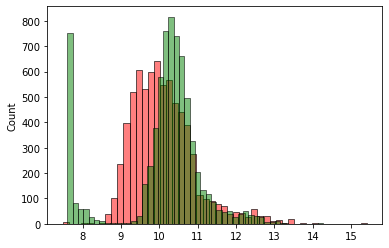

In [374]:
sns.histplot(y_pred, color = 'red',alpha = 0.5, bins = 50) #alpha controls the transparency
sns.histplot(y_train, color = 'green', alpha = 0.5, bins = 50) 

TIP: alpha controls the transparency for seaborn plots, red is for predictions, green is for 
target (actual)

From this plot it seems that our model is not that good, in many cases it gives a lower
price, peaks are different as well, we could do better.

This is a way to visually check our model performance but we need an objective metric to 
decide on that.

# 2.9 RMSE

In [376]:
def rmse(y, y_pred):
    
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [378]:
rmse(y_train, y_pred)

0.7554192603920119

# 2.10 Validating the model

In [446]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [ ]:
Lets create a function that prepares the dataset for training, validation etc. 
in the same way 

In [380]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [383]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

Now apply model on validation dataset and calculate RMSE

In [387]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301591

# 2.11 Simple feature engineering

In [388]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


we see that the year is one important feature for the car price, but we didnt use it, we can
calculate the age of the car instead and use it as a feature

In [389]:
df_train.year.max()

2017

Lets start from 2017 as the "current year" for the age of the cars

In [390]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [391]:
def prepare_X(df):
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [392]:
X_train = prepare_X(df_train)

In [393]:
df_train.dtypes # but we want to not change the original dataframe !!!!

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                    int64
dtype: object

In [394]:
def prepare_X(df):
    df = df.copy() # so we use copy before adding anything to the original and we work with 
                    # it inside the function
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [397]:
del df_train['age']

In [398]:
X_train = prepare_X(df_train)

In [399]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [400]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [401]:
# First train on X_train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Then validate on X_val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058329

we get lower error so our model improved!

lets plot validation and see!!!

<AxesSubplot:ylabel='Count'>

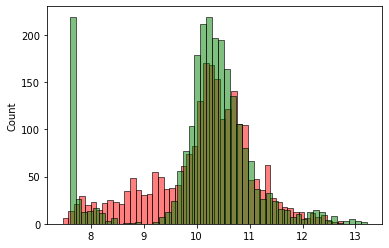

In [403]:
sns.histplot(y_pred, color = 'red',alpha = 0.5, bins = 50) #alpha controls the transparency
sns.histplot(y_val, color = 'green', alpha = 0.5, bins = 50) 

There are still issues especially at the left part, but generally its improved!

# 2.12 Categorical Variables

Columns like make, engine fuel type etc. 

In [409]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [410]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [411]:
df_train.number_of_doors 

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

number of doors seems numerical but its not in reality

In [412]:
df_train.number_of_doors == 2

0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [413]:
(df_train.number_of_doors == 2).astype('int') #convert it to integer

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

The idea here is to create one column for each one of the different door options, that has
an integer 0 or 1 corresponding to True of false, in other words we will have one column for
2 doors, one for four etc

In [414]:

# df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int') 
# df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int') 
# df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int') 

In [432]:
# Better with a loop though

for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int') 

In [434]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


#### Lets add now these new features for the doors in our function that prepares the data

In [447]:
def prepare_X(df):
    df = df.copy() # so we use copy before adding anything to the original and we work with 
                    # it inside the function
        
    features = base.copy() # keep base unmodified
    
    df['age'] = 2017 - df.year
#     features = base + ['age'] # if we dont use append as we dont want to change the base list
                             # everytime 
    
   
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int') 
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [448]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

Now we see we have the extra columns we added

Lets see if theres improvement!

In [449]:
# First train on X_train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Then validate on X_val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502988

previous rmse was 0.5172055461058329, so theres a really small improvement, number of doors
doesn't seem to be that important

Let's add the make of the cars!

In [450]:
df.make.nunique()

48

In [454]:
df.make.value_counts().head(5) # get top 5

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [457]:
makes = list(df.make.value_counts().head(5).index)

#### Again lets add these new features in the preparation function

In [458]:
def prepare_X(df):
    df = df.copy() # so we use copy before adding anything to the original and we work with 
                    # it inside the function
        
    features = base.copy() # keep base unmodified
    
    df['age'] = 2017 - df.year
#     features = base + ['age'] # if we dont use append as we dont want to change the base list
                             # everytime 
    
   
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int') 
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['makes_%s' % v] = (df.make == v).astype('int') 
        features.append('makes_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [459]:
# First train on X_train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Then validate on X_val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849555213

0.5157995641502988 previous rmse, again not as drastic improvement as when age was added

In [460]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [467]:
categorical_variables = [ 
    'make',
    'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style'
]

So now we can do the same thing we did before for categorical columns but for all of these

In [468]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head(5).index) # get top 5 of each category

In [469]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

#### And as usual lets fix our prepare function and throw in all these

So lets pass for each key and then for each of the values that go with that key in the dict

In [481]:
def prepare_X(df):
    df = df.copy() # so we use copy before adding anything to the original and we work with 
                    # it inside the function
        
    features = base.copy() # keep base unmodified
    
    df['age'] = 2017 - df.year
#     features = base + ['age'] # if we dont use append as we dont want to change the base list
                             # everytime 
    
   
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int') 
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items(): # loop over keys
        for v in values:                 # loop over values
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int') 
            features.append('%s_%s' % (c,v))
 
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [482]:
# First train on X_train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Then validate on X_val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

428.2812805730471

So terribly worse model significantly higher rmse!!! something went wrong

In [487]:
w0

-9.168294193388042e+16

so we have a huge negative number for bias, also for weights

In [491]:
w

array([-5.96874582e-01,  9.33277310e+01,  1.31903902e+01,  2.68033924e+01,
       -4.18756745e-03,  6.02156238e+00,  1.16637119e+04,  1.17046112e+04,
        1.16258555e+04, -3.49066238e+01, -2.15629246e+00,  8.79070694e+01,
       -5.93795168e+01,  2.21777574e+01,  1.30132391e+01,  7.49814938e+01,
        3.13614797e+01,  1.41940055e+02, -3.97763225e+02,  7.32907649e+16,
        7.32907649e+16,  7.32907649e+16,  7.32907649e+16,  7.32907649e+16,
        1.83921770e+16,  1.83921770e+16,  1.83921770e+16,  1.83921770e+16,
       -2.83067121e+01, -1.57787354e+01, -1.26094415e+01, -5.51865378e+00,
       -1.88973979e+01, -1.21813005e+02, -1.11018220e+02, -9.86452893e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

# 2.13 Regularization

So what happens when we have 2 duplicate features/columns? The inverse does not exist

In [498]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [500]:
XTX = X.T.dot(X) # Compute gram matrix

XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

We see that two columns of the gram matrix are also duplicates, and due to two columns
being linear dependent theres no inverse

In [501]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

So it returns an error, the matrix is singular

In our problem its more like the data is not that clean, theres noise so for eg

X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.0000001],
]

Instead of 5 exactly its rly close to 5

In [519]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.0000001],
]
y = [1, 2, 3, 1, 2, 3]
X = np.array(X)
XTX = X.T.dot(X) # Compute gram matrix

XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

They are not the same, matrix is not exactly singular, its invertible technically, but 
practically its not, the inverse shouldnt exist, so we get huge numbers

In [518]:
XTX_inv = np.linalg.inv(XTX)

XTX_inv

array([[ 3.93617174e-02, -1.76703046e+05,  1.76703004e+05],
       [-1.76703046e+05,  4.02107113e+13, -4.02107110e+13],
       [ 1.76703004e+05, -4.02107110e+13,  4.02107106e+13]])

In [520]:
XTX_inv.dot(X.T).dot(y) # to get the w

array([ 2.85838502e-01, -5.04106388e+06,  5.04106425e+06])

we see that for the 1st feature its fine (the unique feature), but for the others that were 
not we get huge values

To solve we could add a small number in the diagonal to make them different



In [527]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.000001],
    [2, 1.000001, 1.0001],
]

XTX = np.array(XTX)

In [528]:
np.linalg.inv(XTX)

array([[-3.33333556e-01,  3.33333389e-01,  3.33333389e-01],
       [ 3.33333389e-01, -5.00000083e+05,  4.99999917e+05],
       [ 3.33333389e-01,  4.99999917e+05, -5.00000083e+05]])

SO let's add this small number to the diagonal!!! 

In [530]:
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.000001],
    [2, 1.000001, 1.01],
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[ -0.33668928,   0.33501404,   0.33501404],
       [  0.33501404,  49.92040945, -50.08959155],
       [  0.33501404, -50.08959155,  49.92040945]])

The larger the number we add, the more we can control these weights!

Lets implement it!

In [531]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.000001],
    [2, 1.000001, 1],
]

In [534]:
XTX = XTX + 0.1 * np.eye(3) # REGULARIZATION, this a = 0.1 becomes a parameter

In [535]:
np.linalg.inv(XTX)

array([[-0.37293014,  0.35348811,  0.35348811],
       [ 0.35348811,  4.44740292, -4.64358882],
       [ 0.35348811, -4.64358882,  4.44740292]])

##### Function training 

Include this regularization

In [536]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) 
    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # which is a tuple
    
    return w_full[0], w_full[1:] # return 1st element of the tuple (bias) and the weights

In [538]:
# First train on X_train
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

#Then validate on X_val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565219901277363

So it's actually better than we had before with regularization ! But remember r is parameter, it needs tuning, if too high/low it can worsen performance

# 2.14 Tuning the model

Lets try to find the best value for this r, using the validation set

In [540]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:

    # First train on X_train
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)

    #Then validate on X_val
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -9.168294193388042e+16 428.2812805730471
1e-05 8.347830388359874 0.45651697538764
0.0001 6.275056938849407 0.45651706551121113
0.001 6.2859344339738055 0.4565175088748918
0.1 6.191208678367223 0.4565692763017216
1 5.63489666748297 0.45722043179962735
10 4.283980108978984 0.47014569320990524


Looks like 0.001 is a good r 

In [541]:
r = 0.001

# First train on X_train
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

#Then validate on X_val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)

score

0.4565175088748918

# 2.15 Using the model

So after tuning the model with the validation set, we will check it also with the test 
dataset

In [542]:
 df_train, df_val

(             make        model  year                engine_fuel_type  \
 0       chevrolet       cobalt  2008                regular_unleaded   
 1          toyota       matrix  2012                regular_unleaded   
 2          subaru      impreza  2016                regular_unleaded   
 3      volkswagen      vanagon  1991                regular_unleaded   
 4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
 ...           ...          ...   ...                             ...   
 7145          bmw     4_series  2015     premium_unleaded_(required)   
 7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
 7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
 7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
 7149   volkswagen           cc  2017  premium_unleaded_(recommended)   
 
       engine_hp  engine_cylinders transmission_type      driven_wheels  \
 0         148.0               4.0            m

Let's combine those !

In [543]:
df_full_train = pd.concat([df_train, df_val])

In [545]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [546]:
df_full_train = df_full_train.reset_index(drop  = True)

In [548]:
X_full_train = prepare_X(df_full_train)

X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [550]:
y_full_train = np.concatenate([y_train, y_val])

In [551]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [552]:
w0, w

(6.321861247154073,
 array([ 1.52506334e-03,  1.18188700e-01, -6.66105581e-03, -5.33413910e-03,
        -4.87603208e-05, -9.69091841e-02, -7.92620899e-01, -8.90862105e-01,
        -6.35100829e-01, -4.14339226e-02,  1.75560741e-01, -5.78064119e-04,
        -1.00563876e-01, -9.27549664e-02, -4.66859085e-01,  7.98659953e-02,
        -3.16047636e-01, -5.51981602e-01, -7.89525427e-02,  1.09524999e+00,
         9.19942452e-01,  1.14951986e+00,  2.65265578e+00,  5.09878929e-01,
         1.62948982e+00,  1.53019388e+00,  1.61737260e+00,  1.54537199e+00,
        -9.70559765e-02,  3.73062088e-02, -5.81767475e-02, -2.35940829e-02,
        -1.19357158e-02,  2.18895261e+00,  2.07458271e+00,  2.05916687e+00,
        -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
        -1.58817038e-01]))

This is our FINAL MODEL !

Let's go into the test!

In [553]:
#Then validate on X_val
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)

score

0.45177493089270526

Similar RMSE, so that means our model can generalise well, it didnt get the RMSE score 
before by chance (Remember: Multiple comparisons problem!)

Now we can use this model for price prediction!

In [554]:
df_test.iloc[20] # lets pretend this is a new car, our model hasnt seen this in training!

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

Usually irl this could be from a website or an app where people enter values, so it can be 
a dictionary sent to a model etc. Requests usually are dictionaries



In [555]:
car = df_test.iloc[20].to_dict() # USER sent a dictionary
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

User entered info, a dictionary is made, but our prepare_X function waits for a dataframe,
lets create a df

In [557]:
df_small = pd.DataFrame([car]) # pass the list of dictionaries if there are more
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [559]:
X_small = prepare_X(df_small)

X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [561]:
y_pred = w0 + X_small.dot(w)

y_pred 

array([10.46265171])

In [562]:
y_pred[0]

10.462651707591696

Remember we need to undo the logarithm to get the price in euros etc, undo the transform

In [563]:
np.expm1(y_pred[0])

34983.19641818231

In [564]:
np.expm1(y_test[20]) # how much it actually costs

35000.00000000001